In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sys
import time
import seaborn as sns
import pandas as pd
import cupy as cp

from tomo_encoders.tasks.digital_zoom import *
from tomo_encoders import viewer
sys.path.append('/home/atekawade/TomoEncoders/scratchpad/voids_paper/bin/tests')
from utils import *
import numexpr as ne
from tomo_encoders.misc.img_stats import calc_SNR

In [2]:
projs, theta, center = read_raw_data(raw_fname, wd*b)
b, b_K = 4, 4
print(f"EXPERIMENT with b, b_K {(b,b_K)}")

EXPERIMENT with b, b_K (4, 4)


In [3]:
voids_b = coarse_map(projs, theta, center, b, b_K, remove_dust = 0)
voids_b_dust2 = coarse_map(projs, theta, center, b, b_K, remove_dust = 2)
voids_b_dust3 = coarse_map(projs, theta, center, b, b_K, remove_dust = 3)
sizes_dust2 = np.cbrt(voids_b_dust2["sizes"])
sizes = np.cbrt(voids_b["sizes"])
sizes_dust3 = np.cbrt(voids_b_dust3["sizes"])

	TIME: COARSE RECON 9.84 secs
	STAT: voids found - 372264
	TIME: LABELING 12.77 secs
	TIME: COARSE RECON 9.09 secs
	STAT: voids found - 45296
	TIME: LABELING 14.19 secs
	TIME: COARSE RECON 9.13 secs
	STAT: voids found - 19047
	TIME: LABELING 13.25 secs


(0.0, 20.0)

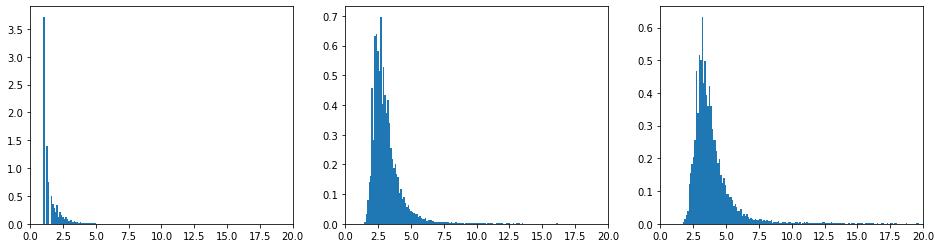

In [4]:
fig, ax = plt.subplots(1,3, figsize = (16,4))
_ = ax[0].hist(sizes, bins = 500, density = True)
ax[0].set_xlim([0,20])
_ = ax[1].hist(sizes_dust2, bins = 500, density = True)
ax[1].set_xlim([0,20])
_ = ax[2].hist(sizes_dust3, bins = 500, density = True)
ax[2].set_xlim([0,20])

In [5]:
np.sum(sizes_dust3 <=1)

0

In [6]:
np.sum(sizes_dust2 <=1)

0

In [13]:
np.size(sizes) - np.sum(sizes <=1)

66243

In [8]:
ept = np.array([0,0,0])
cpt = np.array([2,2,2])
np.all(np.clip(ept-cpt-2,0,None))

False

In [9]:
slice(0,2)

slice(0, 2, None)

In [10]:
a = np.arange(20)

In [11]:
a[slice(0,2)]

array([0, 1])